In [1]:
import json
from matplotlib import pyplot
import numpy
from sklearn.metrics import confusion_matrix
import spacy
from spacy.training import offsets_to_biluo_tags

In [2]:
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return (data)

In [3]:
nlp = spacy.load("output/model-best")

In [4]:
docs = load_data("data/test_data.json")
print(docs[10])

['With half of the global aluminium capacity now lossmaking, Colin Hamilton, analyst at BMO Capital Markets, expects a more aggressive response from the industry than CRU.', {'entities': [[24, 33, 'COMMODITY']]}]


In [5]:
def get_cleaned_label(label: str):
    if "-" in label:
        return label.split("-")[1]
    else:
        return label

In [6]:
def create_total_target_vector(docs):
    target_vector = []
    for doc in docs:
        new = nlp.make_doc(doc[0])
        entities = doc[1]["entities"]
        bilou_entities = offsets_to_biluo_tags(new, entities)
        final = []
        for item in bilou_entities:
            final.append(get_cleaned_label(item))
        target_vector.extend(final)
    return target_vector

In [7]:
def create_prediction_vector(text):
    return [get_cleaned_label(prediction) for prediction in get_all_ner_predictions(text)]

In [8]:
def create_total_prediction_vector(docs: list):
    prediction_vector = []
    for doc in docs:
        prediction_vector.extend(create_prediction_vector(doc[0]))
    return prediction_vector

In [9]:
def get_all_ner_predictions(text):
    doc = nlp(text)
    entities = [(entity.start_char, entity.end_char, entity.label_) for entity in doc.ents]
    bilou_entities = offsets_to_biluo_tags(doc, entities)
    return bilou_entities

In [10]:
def get_model_labels():
    labels = list(nlp.get_pipe("ner").labels)
    labels.append("O")
    return sorted(labels)

In [11]:
def get_dataset_labels():
    return sorted(set(create_total_target_vector(docs)))

In [12]:
def generate_confusion_matrix(docs): 
    classes = sorted(set(create_total_target_vector(docs)))
    y_true = create_total_target_vector(docs)
    y_prediction = create_total_prediction_vector(docs)
    print(y_true)
    print(y_prediction)
    return confusion_matrix(y_true, y_prediction, classes)

In [13]:
def plot_confusion_matrix(docs, classes, normalize=False, cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    title = 'Confusion Matrix for SpaCy NER'

    # Compute confusion matrix
    confusion_matrix = generate_confusion_matrix(docs)
    if normalize:
        confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, numpy.newaxis]

    fig, ax = pyplot.subplots()
    im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=numpy.arange(confusion_matrix.shape[1]),
           yticks=numpy.arange(confusion_matrix.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    frmt = '.2f' if normalize else 'd'
    threshold = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(j, i, format(confusion_matrix[i, j], frmt),
                    ha="center", va="center",
                    color="white" if confusion_matrix[i, j] > threshold else "black")
    fig.tight_layout()

    return confusion_matrix, ax, pyplot

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'COMMODITY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'COMMODITY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'COMMODITY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'COMMODITY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O

/Users/andy.gout/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=['COMMODITY', 'O'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


(array([[  4779,      6],
        [    80, 133285]]),
 <AxesSubplot:title={'center':'Confusion Matrix for SpaCy NER'}, xlabel='Predicted label', ylabel='True label'>,
 <module 'matplotlib.pyplot' from '/Users/andy.gout/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

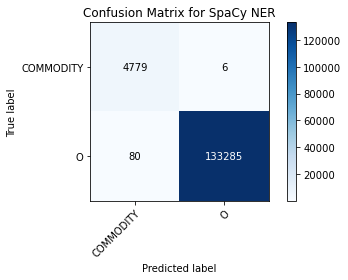

In [14]:
plot_confusion_matrix(docs,classes=get_dataset_labels(),normalize=False)

In [16]:
# Top left: Correctly identified commodities as commodities (true positives)
# Top right: Incorrectly identified commodities as non-commodities (false positives)
# Bottom left: Incorrectly identified non-commodities as commodities (false negatives)
# Bottom right: Correctly identified non-commodities as non-commodities (true negatives)